In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
import re
import nltk
import string
import json
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [37]:
train = pd.read_csv('train.csv')
train

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable objects back from his short nightmares of being chased by a demon. Selling them makes him rich.,fantasy
1,50185,Entity Project,A director and her friends renting a haunted house to capture paranormal events in order to prove it and become popular.,horror
2,34131,Behavioral Family Therapy for Serious Psychiatric Disorders,This is an educational video for families and family therapists that describes the Behavioral Family Therapy approach to dealing with serious psychiatric illnesses.,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discover that a glacier is leaking a liquid that appears to be affecting local wildlife.,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By Night Shadows United in One Fight Venting the Fire of their Fury Against the Hated Oppressors.,action
...,...,...,...,...
53995,80325,Untitled Monkeyshine/Ugly Brother Project,Two loser pest control buddies find themselves battling aliens in their sleepy lake town in 1976.,scifi
53996,84712,The Great Swindle,A seductive woman gets involved in relationships with several people. All of the characters play games of deceit with one another and things get more and more dangerous.,thriller
53997,69801,When Men Get Pregnant,"Duyen, a wedding dress staff, who decides to continue a pregnancy despite Hung, her lover advising her to have an abortion. He hit by car while chasing her. When he woke up, he saw all men around are pregnant instead of their wife.",romance
53998,7678,Suttu Pidikka Utharavu,The people of a crowded colony in Coimbatore city go through a hard time as a few heavily armed criminals enter the place when they try to escape from the cops.,action


In [17]:
train.describe()

,id
count,54000.000000
mean,44994.882352
std,25980.135904
min,0.000000
25%,22569.750000
50%,45000.000000
75%,67466.250000
max,89999.000000


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54000 non-null  int64 
 1   movie_name  54000 non-null  object
 2   synopsis    54000 non-null  object
 3   genre       54000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [19]:
train.isnull().sum()

id            0
movie_name    0
synopsis      0
genre         0
dtype: int64

In [21]:
test = pd.read_csv('test.csv')
test

,id,movie_name,synopsis,genre
0,16863,A Death Sentence,"12 y.o. Ida's dad'll die without a DKK1,500,000 operation. Ida plans to steal the money from the bank, her mom installed alarm systems in. She'll need her climbing skills, her 2 friends and 3 go-karts.",action
1,48456,Intermedio,"A group of four teenage friends become trapped in a Mexican border tunnel where they fall prey, one-by one, to tortured ghosts who haunt it.",action
2,41383,30 Chua Phai Tet,"A guy left his home for 12 years till he came back to claim what's his from his father, the vast Land, just to uncover that he had to live that day, year-end Lunar day, for another 12 years.",action
3,84007,Paranoiac,A man long believed dead returns to the family estate to claim his inheritance.,action
4,40269,Ordinary Happiness,"After a deadly accident, Paolo comes back on Earth just 92 minutes more, thanks to a calculation error made in a paradise office.",action
...,...,...,...,...
35995,73156,Mysterious Doctor Satan,"A mad scientist plots the domination of America and only the masked hero, The Copperhead, can stop him.",action
35996,21242,Blondes at Work,Steve promises his captain not to favor Torchy with stories over other papers but becomes frustrated as to how she continues to scoop her rivals.,action
35997,70135,The Hurricane,A Polynesian sailor unjustly imprisoned after defending himself against a colonial bully is relentlessly persecuted by his island's martinet French governor.,action
35998,85987,Malayankunju,Anikkuttan is an ill-tempered electronics technician who leads a quiet life with his mother. His daily routines are disrupted when his next door neighbor's newborn baby stirs up undesirable memories from his past.,action


In [24]:
test.drop('genre',axis=1)

,id,movie_name,synopsis
0,16863,A Death Sentence,"12 y.o. Ida's dad'll die without a DKK1,500,000 operation. Ida plans to steal the money from the bank, her mom installed alarm systems in. She'll need her climbing skills, her 2 friends and 3 go-karts."
1,48456,Intermedio,"A group of four teenage friends become trapped in a Mexican border tunnel where they fall prey, one-by one, to tortured ghosts who haunt it."
2,41383,30 Chua Phai Tet,"A guy left his home for 12 years till he came back to claim what's his from his father, the vast Land, just to uncover that he had to live that day, year-end Lunar day, for another 12 years."
3,84007,Paranoiac,A man long believed dead returns to the family estate to claim his inheritance.
4,40269,Ordinary Happiness,"After a deadly accident, Paolo comes back on Earth just 92 minutes more, thanks to a calculation error made in a paradise office."
...,...,...,...
35995,73156,Mysterious Doctor Satan,"A mad scientist plots the domination of America and only the masked hero, The Copperhead, can stop him."
35996,21242,Blondes at Work,Steve promises his captain not to favor Torchy with stories over other papers but becomes frustrated as to how she continues to scoop her rivals.
35997,70135,The Hurricane,A Polynesian sailor unjustly imprisoned after defending himself against a colonial bully is relentlessly persecuted by his island's martinet French governor.
35998,85987,Malayankunju,Anikkuttan is an ill-tempered electronics technician who leads a quiet life with his mother. His daily routines are disrupted when his next door neighbor's newborn baby stirs up undesirable memories from his past.


In [39]:
train['genre'][0]

'fantasy'

In [43]:
train['genre'].value_counts()

fantasy      5400
horror       5400
family       5400
scifi        5400
action       5400
crime        5400
adventure    5400
mystery      5400
romance      5400
thriller     5400
Name: genre, dtype: int64

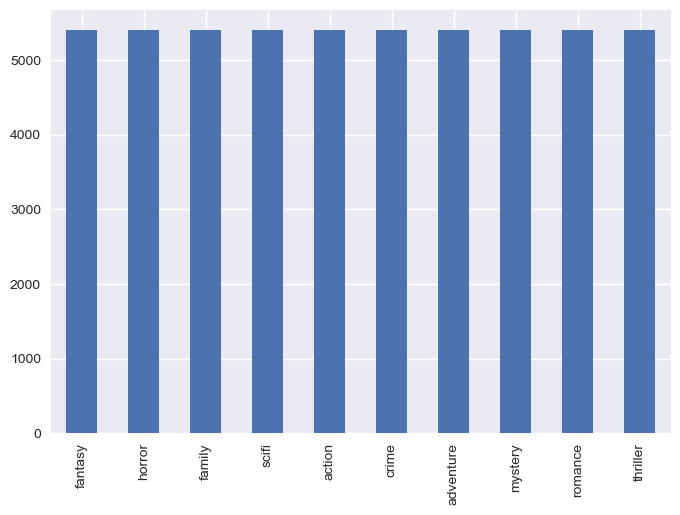

In [44]:
plt.style.use('seaborn')
train['genre'].value_counts().plot(kind = 'bar')
plt.show()

In [45]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [52]:
train['clean_plot'] = train['synopsis'].apply(lambda x: clean_text(x))

In [85]:
test['clean_plot'] = test['synopsis'].apply(lambda x: clean_text(x))

In [86]:
test

,id,movie_name,synopsis,genre,clean_plot
0,16863,A Death Sentence,"12 y.o. Ida's dad'll die without a DKK1,500,000 operation. Ida plans to steal the money from the bank, her mom installed alarm systems in. She'll need her climbing skills, her 2 friends and 3 go-karts.",action,y o idas dadll die without a dkk operation ida plans to steal the money from the bank her mom installed alarm systems in shell need her climbing skills her friends and go karts
1,48456,Intermedio,"A group of four teenage friends become trapped in a Mexican border tunnel where they fall prey, one-by one, to tortured ghosts who haunt it.",action,a group of four teenage friends become trapped in a mexican border tunnel where they fall prey one by one to tortured ghosts who haunt it
2,41383,30 Chua Phai Tet,"A guy left his home for 12 years till he came back to claim what's his from his father, the vast Land, just to uncover that he had to live that day, year-end Lunar day, for another 12 years.",action,a guy left his home for years till he came back to claim whats his from his father the vast land just to uncover that he had to live that day year end lunar day for another years
3,84007,Paranoiac,A man long believed dead returns to the family estate to claim his inheritance.,action,a man long believed dead returns to the family estate to claim his inheritance
4,40269,Ordinary Happiness,"After a deadly accident, Paolo comes back on Earth just 92 minutes more, thanks to a calculation error made in a paradise office.",action,after a deadly accident paolo comes back on earth just minutes more thanks to a calculation error made in a paradise office
...,...,...,...,...,...
35995,73156,Mysterious Doctor Satan,"A mad scientist plots the domination of America and only the masked hero, The Copperhead, can stop him.",action,a mad scientist plots the domination of america and only the masked hero the copperhead can stop him
35996,21242,Blondes at Work,Steve promises his captain not to favor Torchy with stories over other papers but becomes frustrated as to how she continues to scoop her rivals.,action,steve promises his captain not to favor torchy with stories over other papers but becomes frustrated as to how she continues to scoop her rivals
35997,70135,The Hurricane,A Polynesian sailor unjustly imprisoned after defending himself against a colonial bully is relentlessly persecuted by his island's martinet French governor.,action,a polynesian sailor unjustly imprisoned after defending himself against a colonial bully is relentlessly persecuted by his islands martinet french governor
35998,85987,Malayankunju,Anikkuttan is an ill-tempered electronics technician who leads a quiet life with his mother. His daily routines are disrupted when his next door neighbor's newborn baby stirs up undesirable memories from his past.,action,anikkuttan is an ill tempered electronics technician who leads a quiet life with his mother his daily routines are disrupted when his next door neighbors newborn baby stirs up undesirable memories from his past


In [53]:
train

,id,movie_name,synopsis,genre,clean_plot
0,44978,Super Me,A young scriptwriter starts bringing valuable objects back from his short nightmares of being chased by a demon. Selling them makes him rich.,fantasy,a young scriptwriter starts bringing valuable objects back from his short nightmares of being chased by a demon selling them makes him rich
1,50185,Entity Project,A director and her friends renting a haunted house to capture paranormal events in order to prove it and become popular.,horror,a director and her friends renting a haunted house to capture paranormal events in order to prove it and become popular
2,34131,Behavioral Family Therapy for Serious Psychiatric Disorders,This is an educational video for families and family therapists that describes the Behavioral Family Therapy approach to dealing with serious psychiatric illnesses.,family,this is an educational video for families and family therapists that describes the behavioral family therapy approach to dealing with serious psychiatric illnesses
3,78522,Blood Glacier,Scientists working in the Austrian Alps discover that a glacier is leaking a liquid that appears to be affecting local wildlife.,scifi,scientists working in the austrian alps discover that a glacier is leaking a liquid that appears to be affecting local wildlife
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By Night Shadows United in One Fight Venting the Fire of their Fury Against the Hated Oppressors.,action,buy day four men widely apart in life by night shadows united in one fight venting the fire of their fury against the hated oppressors
...,...,...,...,...,...
53995,80325,Untitled Monkeyshine/Ugly Brother Project,Two loser pest control buddies find themselves battling aliens in their sleepy lake town in 1976.,scifi,two loser pest control buddies find themselves battling aliens in their sleepy lake town in
53996,84712,The Great Swindle,A seductive woman gets involved in relationships with several people. All of the characters play games of deceit with one another and things get more and more dangerous.,thriller,a seductive woman gets involved in relationships with several people all of the characters play games of deceit with one another and things get more and more dangerous
53997,69801,When Men Get Pregnant,"Duyen, a wedding dress staff, who decides to continue a pregnancy despite Hung, her lover advising her to have an abortion. He hit by car while chasing her. When he woke up, he saw all men around are pregnant instead of their wife.",romance,duyen a wedding dress staff who decides to continue a pregnancy despite hung her lover advising her to have an abortion he hit by car while chasing her when he woke up he saw all men around are pregnant instead of their wife
53998,7678,Suttu Pidikka Utharavu,The people of a crowded colony in Coimbatore city go through a hard time as a few heavily armed criminals enter the place when they try to escape from the cops.,action,the people of a crowded colony in coimbatore city go through a hard time as a few heavily armed criminals enter the place when they try to escape from the cops


In [54]:
#most frequent words in the clean_plot

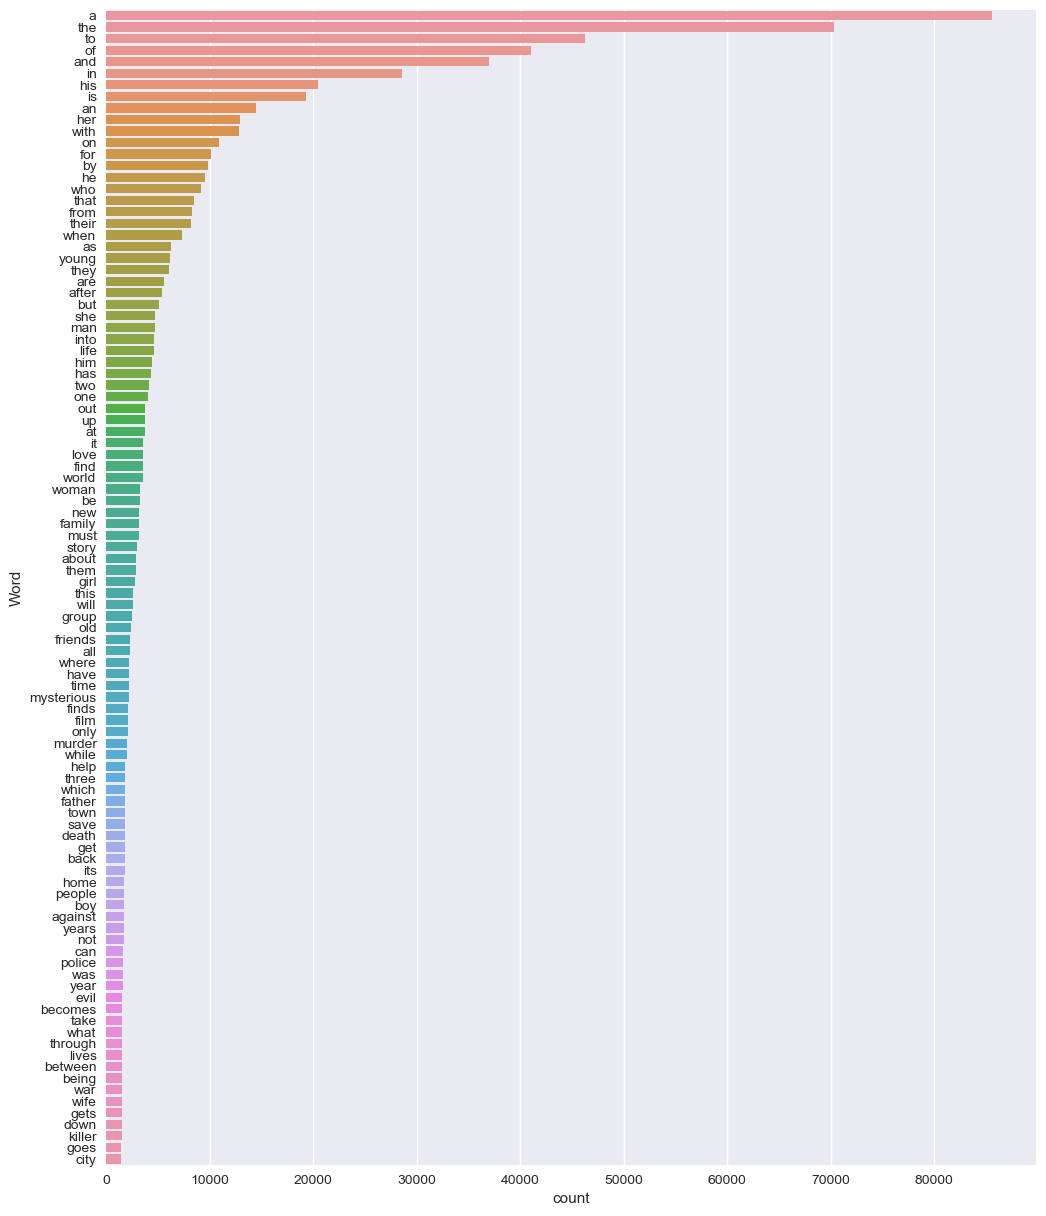

In [55]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})  
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show() 
freq_words(train['clean_plot'], 100)

In [56]:
#removing stopwords

In [57]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# removing stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

train['clean_plot'] = train['clean_plot'].apply(lambda x: remove_stopwords(x))

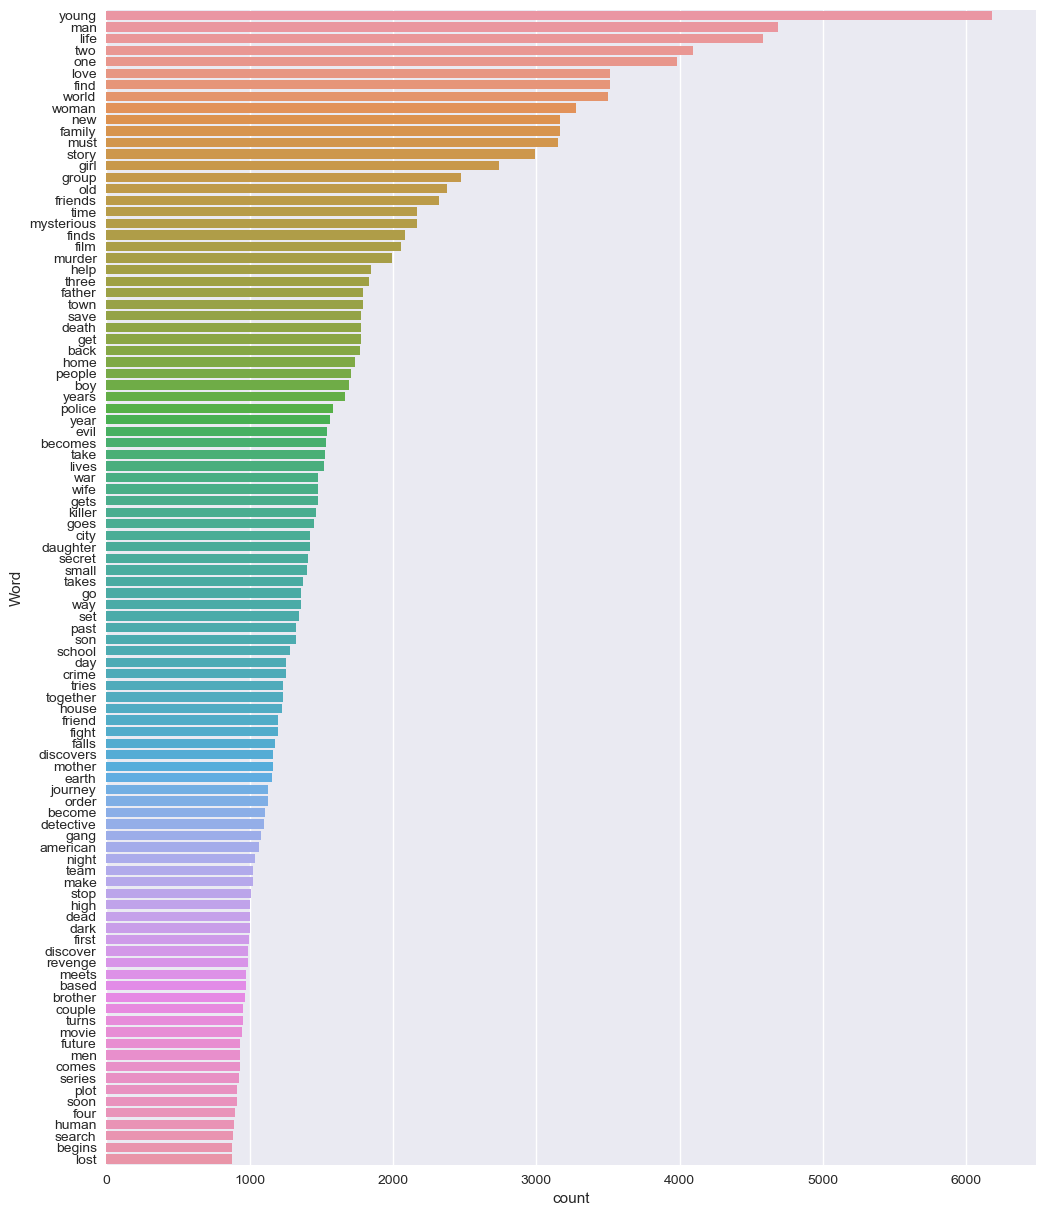

In [58]:
freq_words(train['clean_plot'], 100)

In [87]:
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train['clean_plot'])
X_test = tfidf_vectorizer.transform(test['clean_plot'])

In [88]:
# Split the data into training and testing sets
X = X_train
y = train['genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.3510185185185185
              precision    recall  f1-score   support

      action       0.29      0.24      0.27      1094
   adventure       0.28      0.21      0.24      1067
       crime       0.36      0.40      0.38      1134
      family       0.40      0.43      0.41      1049
     fantasy       0.31      0.28      0.30      1057
      horror       0.39      0.46      0.42      1116
     mystery       0.28      0.29      0.28      1074
     romance       0.49      0.56      0.52      1075
       scifi       0.39      0.46      0.42      1077
    thriller       0.22      0.18      0.20      1057

    accuracy                           0.35     10800
   macro avg       0.34      0.35      0.34     10800
weighted avg       0.34      0.35      0.34     10800



In [89]:
X_test_predictions = classifier.predict(X_test)
test['Predicted_Genre'] = X_test_predictions

In [92]:
# Save the data to the csv file
test.to_csv('predicted_genres.csv', index=False)

In [91]:
x = pd.read_csv('predicted_genres.csv')
x

,id,movie_name,synopsis,genre,clean_plot,Predicted_Genre
0,16863,A Death Sentence,"12 y.o. Ida's dad'll die without a DKK1,500,000 operation. Ida plans to steal the money from the bank, her mom installed alarm systems in. She'll need her climbing skills, her 2 friends and 3 go-karts.",action,y o idas dadll die without a dkk operation ida plans to steal the money from the bank her mom installed alarm systems in shell need her climbing skills her friends and go karts,crime
1,48456,Intermedio,"A group of four teenage friends become trapped in a Mexican border tunnel where they fall prey, one-by one, to tortured ghosts who haunt it.",action,a group of four teenage friends become trapped in a mexican border tunnel where they fall prey one by one to tortured ghosts who haunt it,horror
2,41383,30 Chua Phai Tet,"A guy left his home for 12 years till he came back to claim what's his from his father, the vast Land, just to uncover that he had to live that day, year-end Lunar day, for another 12 years.",action,a guy left his home for years till he came back to claim whats his from his father the vast land just to uncover that he had to live that day year end lunar day for another years,scifi
3,84007,Paranoiac,A man long believed dead returns to the family estate to claim his inheritance.,action,a man long believed dead returns to the family estate to claim his inheritance,horror
4,40269,Ordinary Happiness,"After a deadly accident, Paolo comes back on Earth just 92 minutes more, thanks to a calculation error made in a paradise office.",action,after a deadly accident paolo comes back on earth just minutes more thanks to a calculation error made in a paradise office,fantasy
...,...,...,...,...,...,...
35995,73156,Mysterious Doctor Satan,"A mad scientist plots the domination of America and only the masked hero, The Copperhead, can stop him.",action,a mad scientist plots the domination of america and only the masked hero the copperhead can stop him,scifi
35996,21242,Blondes at Work,Steve promises his captain not to favor Torchy with stories over other papers but becomes frustrated as to how she continues to scoop her rivals.,action,steve promises his captain not to favor torchy with stories over other papers but becomes frustrated as to how she continues to scoop her rivals,mystery
35997,70135,The Hurricane,A Polynesian sailor unjustly imprisoned after defending himself against a colonial bully is relentlessly persecuted by his island's martinet French governor.,action,a polynesian sailor unjustly imprisoned after defending himself against a colonial bully is relentlessly persecuted by his islands martinet french governor,adventure
35998,85987,Malayankunju,Anikkuttan is an ill-tempered electronics technician who leads a quiet life with his mother. His daily routines are disrupted when his next door neighbor's newborn baby stirs up undesirable memories from his past.,action,anikkuttan is an ill tempered electronics technician who leads a quiet life with his mother his daily routines are disrupted when his next door neighbors newborn baby stirs up undesirable memories from his past,thriller
